In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.utils.data as data
import cv2
import matplotlib.pyplot as plt

In [2]:
train_set = datasets.ImageFolder('data/train/', transform=transforms.ToTensor())

In [3]:
train_loader = data.DataLoader(train_set, batch_size=32, shuffle=True)

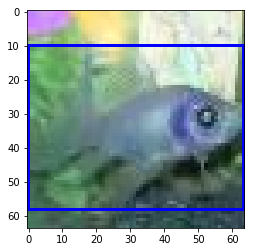

In [4]:
img = cv2.imread('data/train/n01443537/images/n01443537_0.JPEG')

f = open('data/train/n01443537/n01443537_boxes.txt')
l = f.readline()
l = l.split('\t')[1:]
l = [int(i) for i in l]

img = cv2.rectangle(img, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 1)
plt.imshow(img)
plt.show()

In [5]:
class net(nn.Module):
    def __init__(self,):
        super(net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU(inplace=True)
        
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu2 = nn.ReLU(inplace=True)
        
        self.conv3 = nn.Conv2d(128, 64, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU(inplace=True)
        
        self.conv4 = nn.Conv2d(64, 256, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU(inplace=True)
        
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU(inplace=True)
        
        self.avgp = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, 200)
        
    def forward(self, x):
        x = self.relu1(self.bn1(self.conv1(x)))
        x = self.relu2(self.bn2(self.conv2(x)))
        x = self.relu3(self.bn3(self.conv3(x)))
        x = self.relu4(self.bn4(self.conv4(x)))
        x = self.relu5(self.bn5(self.conv5(x)))
        x = self.avgp(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [6]:
r = net()
r.cuda()

net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace)
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace)
  (conv4): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU(inplace)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu5): ReLU(inplace)
  (avgp): AdaptiveAvgPool2d(outpu

In [7]:
r(torch.Tensor(32, 3, 64, 64).cuda()).shape

torch.Size([32, 200])

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(r.parameters())

In [ ]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        if i % 200 == 49: 
            print("-- ITERATION:", i)
        input, target = data

        # wrap input + target into variables
        input_var = input.cuda()
        target_var = target.cuda()

            # compute output
        output = r(input_var)
        loss = criterion(output, target_var)
        
        # computer gradient + sgd step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print progress
        running_loss += loss.item()
            
            
        if i % 200 == 49:  # print every 2k mini-batches
            print(running_loss / 50)
            running_loss = 0.

-- ITERATION: 49
5.3138104343414305
-- ITERATION: 249
20.245030393600462
-- ITERATION: 449
19.220450668334962
-- ITERATION: 649
18.6043771648407
-- ITERATION: 849
18.115851497650148
-- ITERATION: 1049
17.526343946456908
-- ITERATION: 1249
16.860241174697876
-- ITERATION: 1449
16.38887170314789
-- ITERATION: 1649
16.284700484275817
-- ITERATION: 1849
15.851930117607116
-- ITERATION: 2049
15.662809271812439
-- ITERATION: 2249
15.439816846847535
-- ITERATION: 2449
15.15548442363739
-- ITERATION: 2649
15.027465353012085
-- ITERATION: 2849
14.870348505973816
-- ITERATION: 3049
14.682711358070373
-- ITERATION: 49
3.483307595252991
-- ITERATION: 249
14.167521710395812
-- ITERATION: 449
14.119574127197266
-- ITERATION: 649
13.939767889976501
-- ITERATION: 849
13.981488704681396
-- ITERATION: 1049
13.714345502853394
-- ITERATION: 1249
13.725711522102356
-- ITERATION: 1449
13.641234822273255
-- ITERATION: 1649
13.504711604118347
-- ITERATION: 1849
13.426510906219482
-- ITERATION: 2049
13.4244852